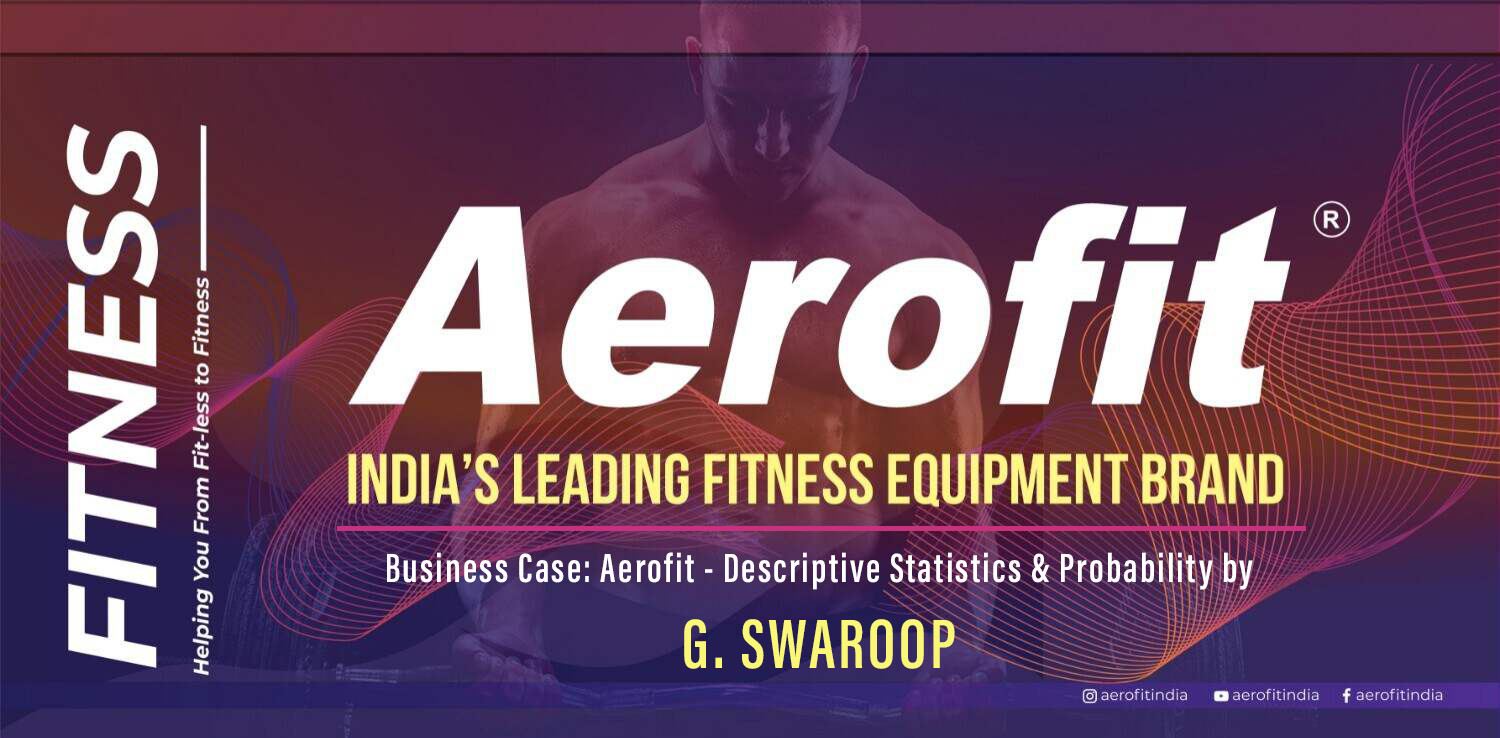

#### About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

#### Defining Problems statement and Analysing Basic Metrics

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

#### Objective

- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts

- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

#### Importing libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\Aerofit.csv")

In [4]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Statistical Summary

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [7]:
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [8]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [9]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [10]:
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [11]:
df['Product'].value_counts().sort_index()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [12]:
df['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [14]:
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat


KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

- **44.44%** of customers bought **KP281** product type
- **33.33%** of customers bought **KP481** product type
- **22.22%** of customers bought **KP781** product type

In [15]:
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Male      57.78
Female    42.22
Name: Gender, dtype: float64

- **57.78%** of customers are Male and **42.22%** customers are Female

In [16]:
marital_status = df['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

- **59.44%** of customers are **Married/Partnered**
- **40.56%** of customers are **Single**

In [17]:
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


- Around **39%** of customers use **3 days per week**
- Less than **2%** of customers use **7 days per week**

In [18]:
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


- **More than 53%** of customers have rated themselves as **average in fitness** (rated 3)
- **14%** of customers have rated their fitness less than average
- **Over 17%** of customers have **peak fitness ratings**

- Total count of all columns is 180.
- Mean age of the customer is 28 years, half of the customer's mean age is 26.
- Mean Education is 15 with maximum as 21 and minimum as 12.
- Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
- Average rating is 3.3 on a scale of 1 to 5.
- Average number of miles the customer walks is 103 with maximum        distance travelled by most people is almost 115 and minimum is 21.
- Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K.
- 104 Males and 76 Females are in the customers list.
- Majority of the customers who have purchased are Married/Partnered.
- Most customers usage treadmill atleast 3 days per week.
- Highest rated Fitness rating is 3.
- Maximum distance covered by the customer in treadmill is 360 miles.

#### conversion of categorical attributes to 'category'

In [19]:
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [20]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


- Categorization of **Fitness Rating** to following **descriptive categories**
1. Poor Shape
2. Bad Shape
3. Average Shape
4. Good Shape
5. Excellent Shape

## Visual Analysis - Univariate & Bivariate

* Understanding the distribution of the data for the quantitative attributes:

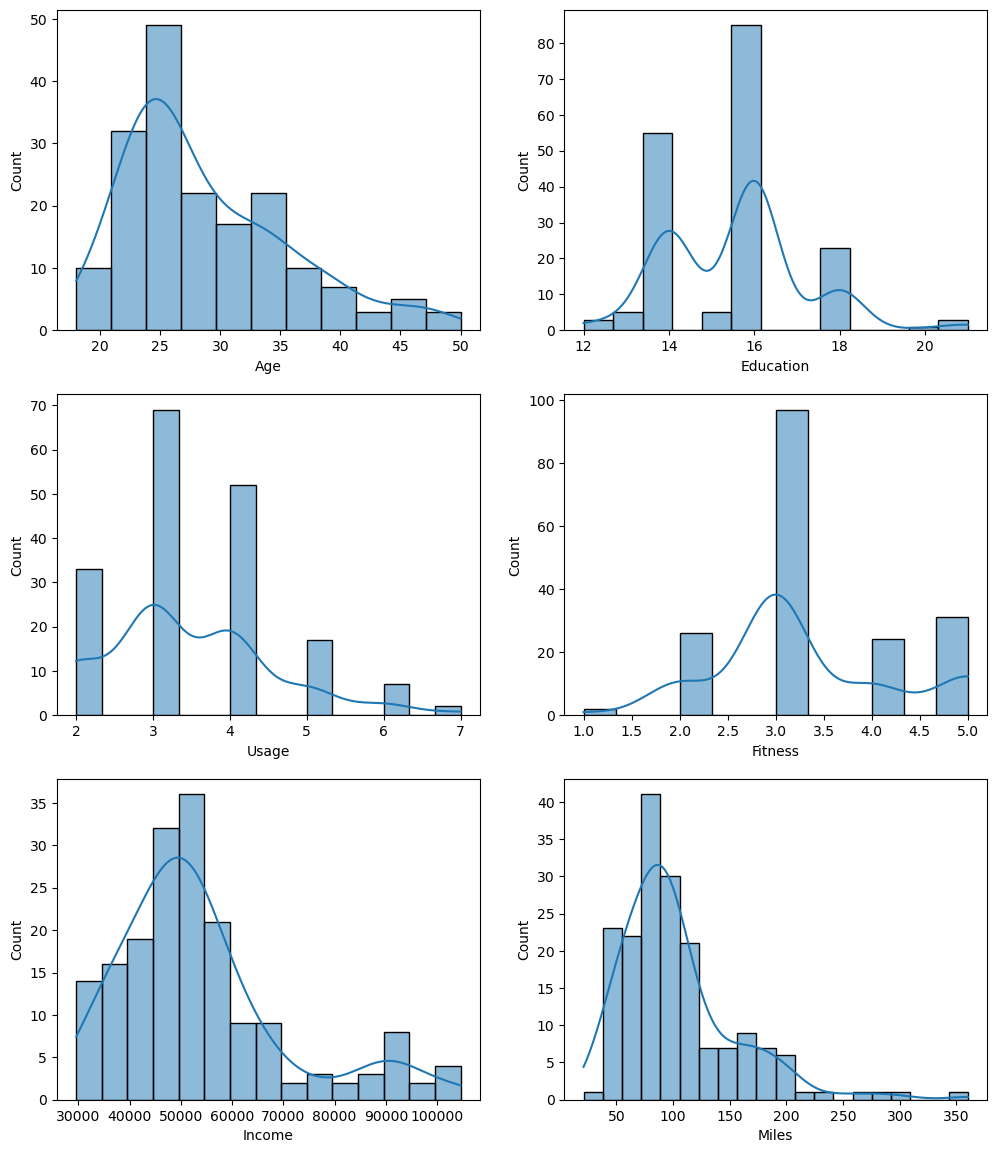

In [21]:
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df,x="Age",kde=True,ax=axis[0,0])
sns.histplot(data=df,x="Education",kde=True,ax=axis[0,1])
sns.histplot(data=df,x="Usage",kde=True,ax=axis[1,0])
sns.histplot(data=df,x="Fitness",kde=True,ax=axis[1,1])
sns.histplot(data=df,x="Income",kde=True,ax=axis[2,0])
sns.histplot(data=df,x="Miles",kde=True,ax=axis[2,1])
plt.show()

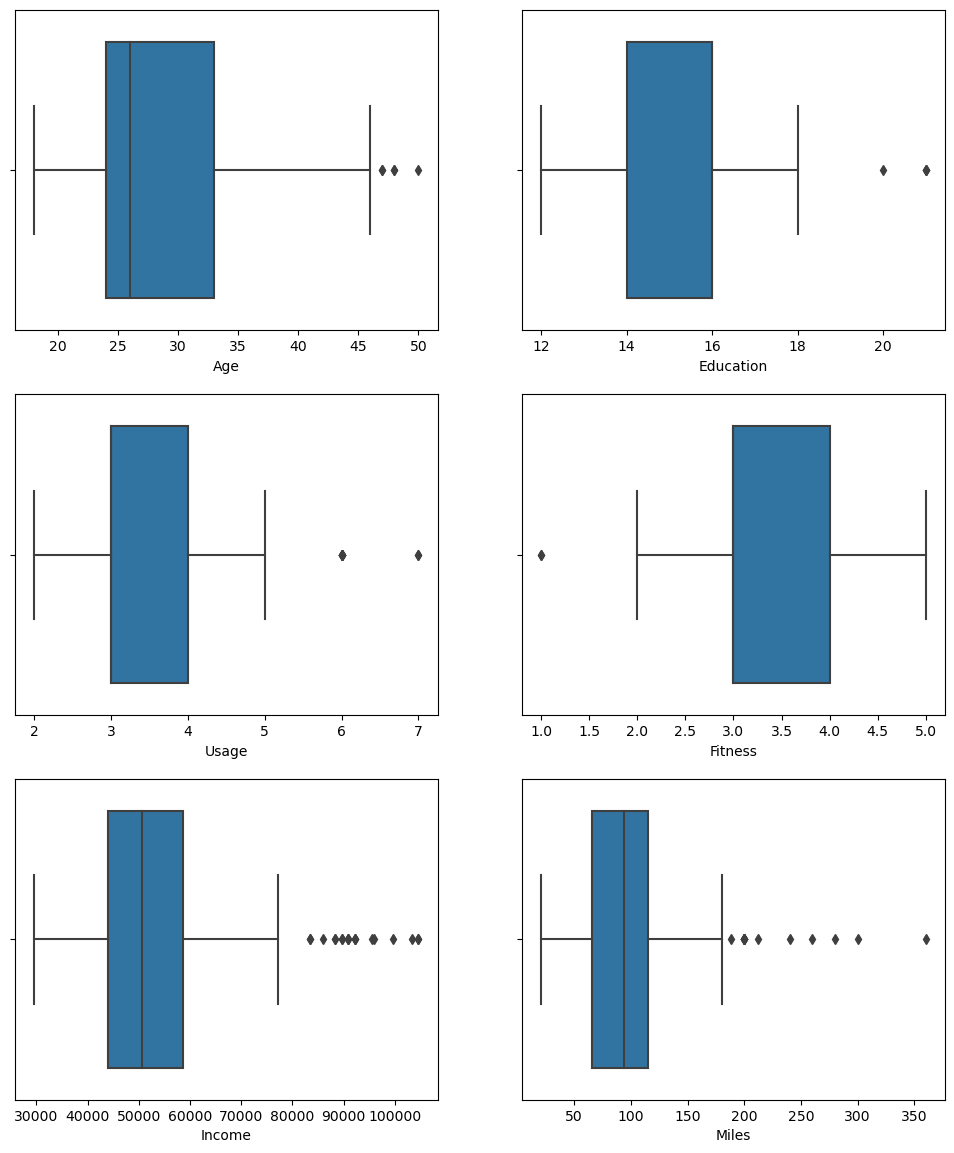

In [22]:
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df,x="Age",orient="h",ax=axis[0,0])
sns.boxplot(data=df,x="Education",orient="h",ax=axis[0,1])
sns.boxplot(data=df,x="Usage",orient="h",ax=axis[1,0])
sns.boxplot(data=df,x="Fitness",orient="h",ax=axis[1,1])
sns.boxplot(data=df,x="Income",orient="h",ax=axis[2,0])
sns.boxplot(data=df,x="Miles",orient="h",ax=axis[2,1])
plt.show()

#### Obervation
  Even from the boxplots it is quite clear that:

- Age, Education and Usage are having very few outliers.
- While Income and Miles are having more outliers.

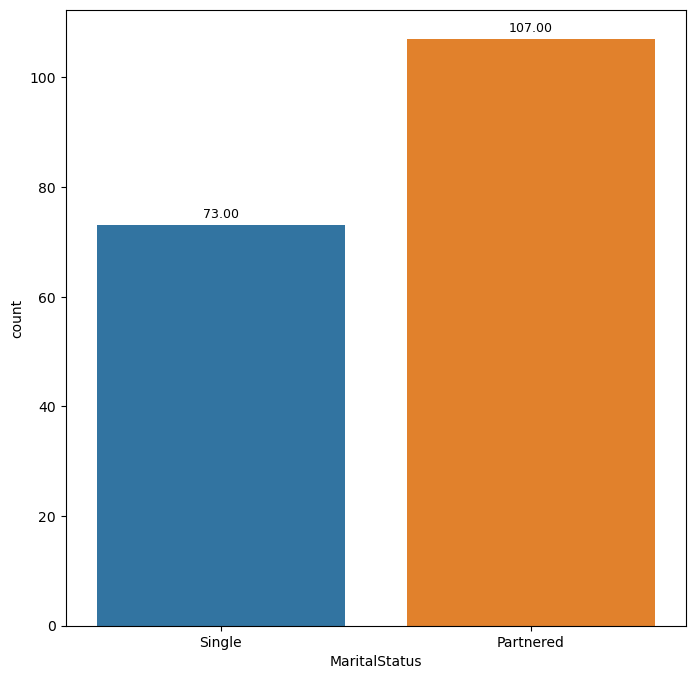

In [23]:
plt.figure(figsize=(8, 8))
MaritalStatus=sns.countplot(data=df,x='MaritalStatus')
for bar in MaritalStatus.patches:
    MaritalStatus.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

- Most products purchased by **couples/Married/Partnered** customer category

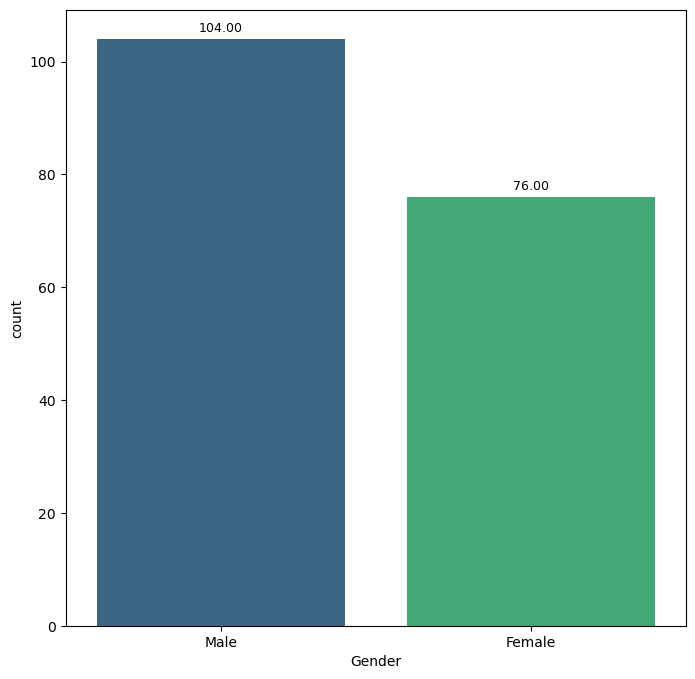

In [24]:
plt.figure(figsize=(8, 8))
Count_of_gender=sns.countplot(data=df,x='Gender',palette="viridis")
for bar in Count_of_gender.patches:
    Count_of_gender.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

- Most of the products are be purchased by **Male** In compare to **Female**

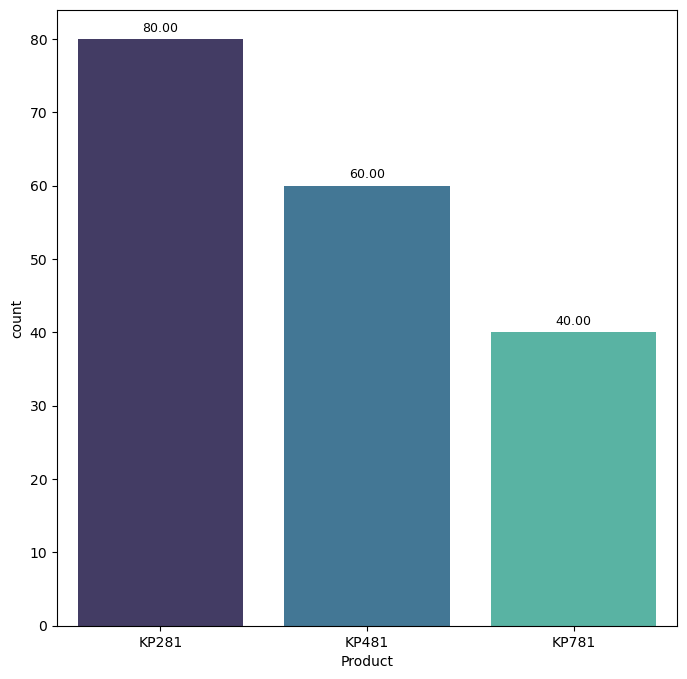

In [25]:
plt.figure(figsize=(8, 8))
Product_counts=sns.countplot(data=df,x='Product',palette="mako")
for bar in Product_counts.patches:
    Product_counts.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

- KP281 is the most commonly purchase product type
- KP481 is the second most top product type purchased
- KP781 is the least purchased product type

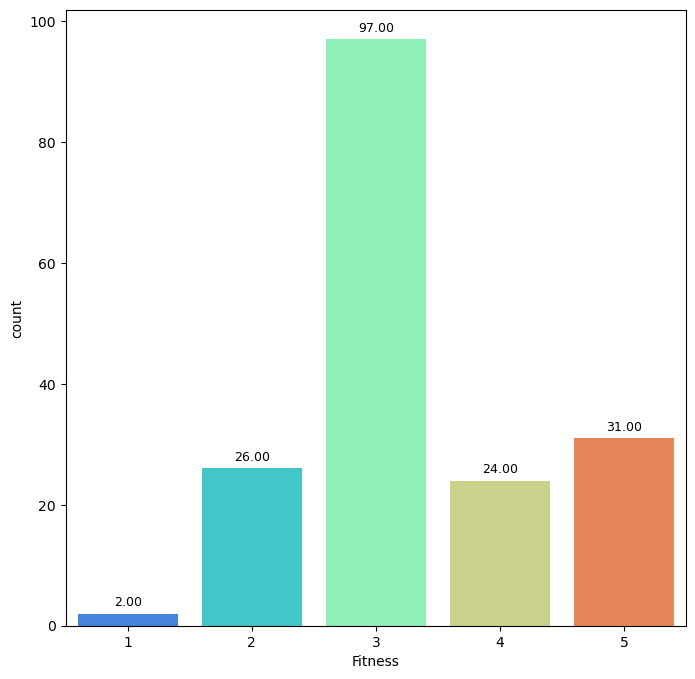

In [26]:
plt.figure(figsize=(8, 8))
Fitness=sns.countplot(data=df,x='Fitness',palette="rainbow")
for bar in Fitness.patches:
    Fitness.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

- More than 90 customers have rated their physical fitness rating as Average
- Excellent shape is the second highest rating provided by the customers

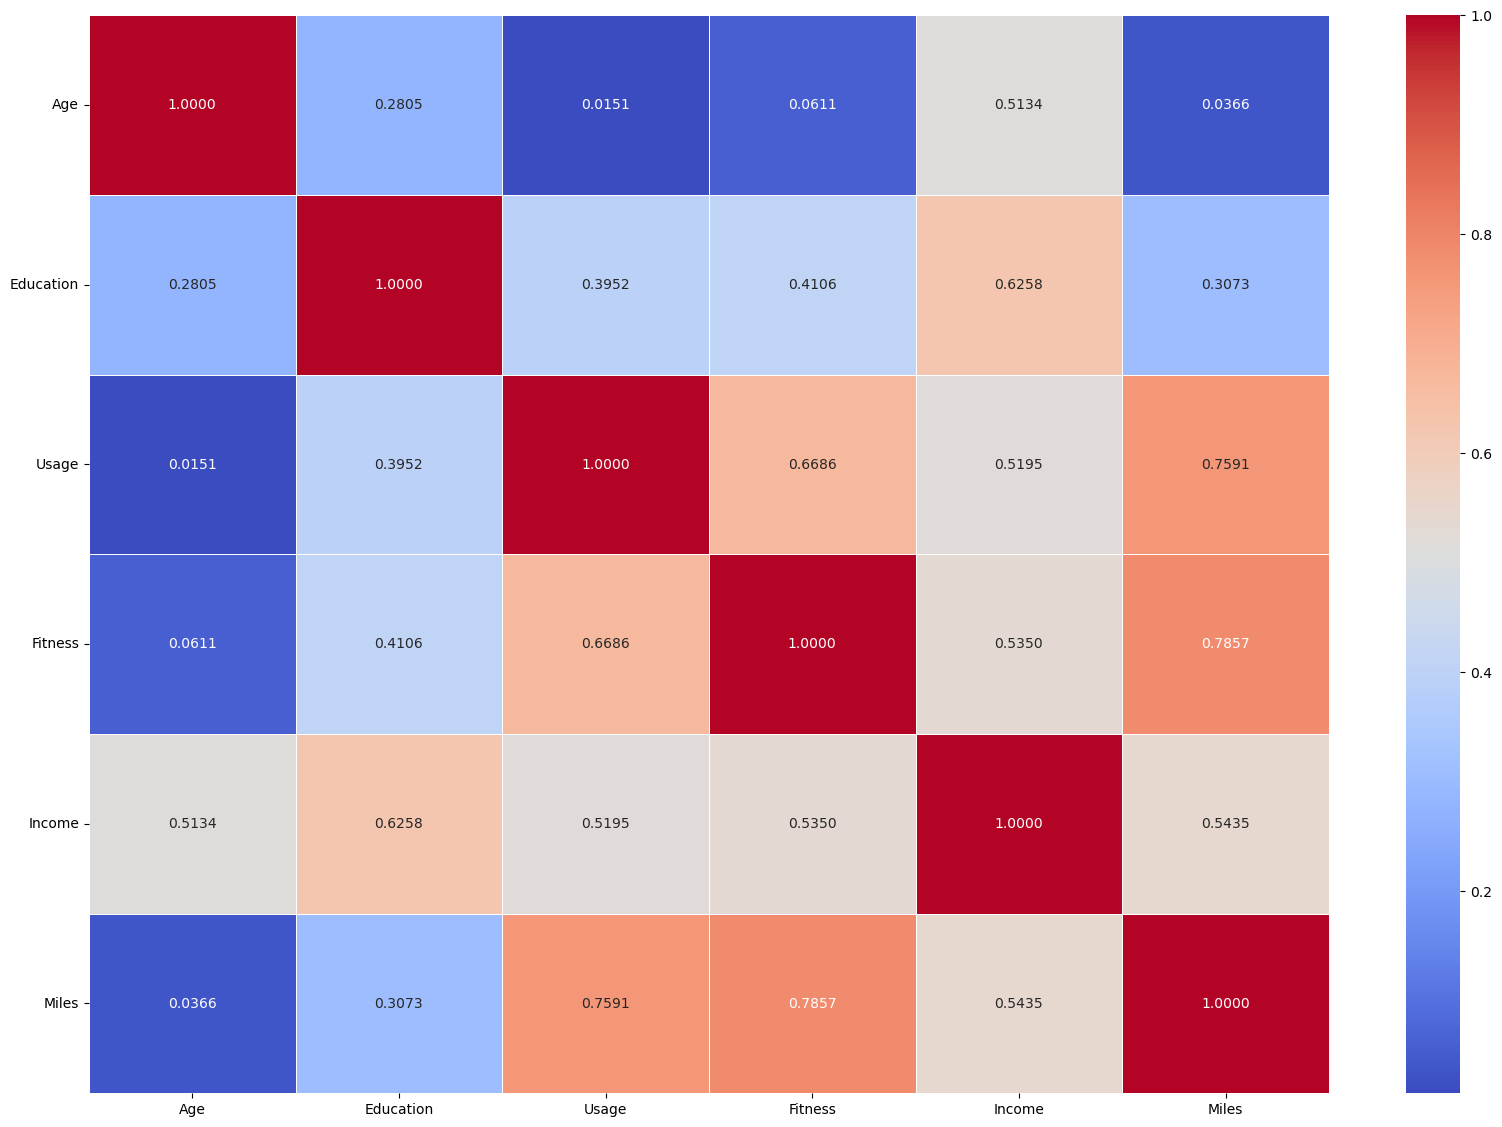

In [27]:

plt.figure(figsize=(20,14))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

 In the above heatmap linear relationship between data points is evaluated

- Correlation between Age and Miles is 0.03
- Correlation between Education and Income is 0.62
- Correlation between Usage and Fitness is 0.66
- Correlation between Fitness and Age is 0.06
- Correlation between Income and Usage is 0.51
- Correlation between Miles and Age is 0.03

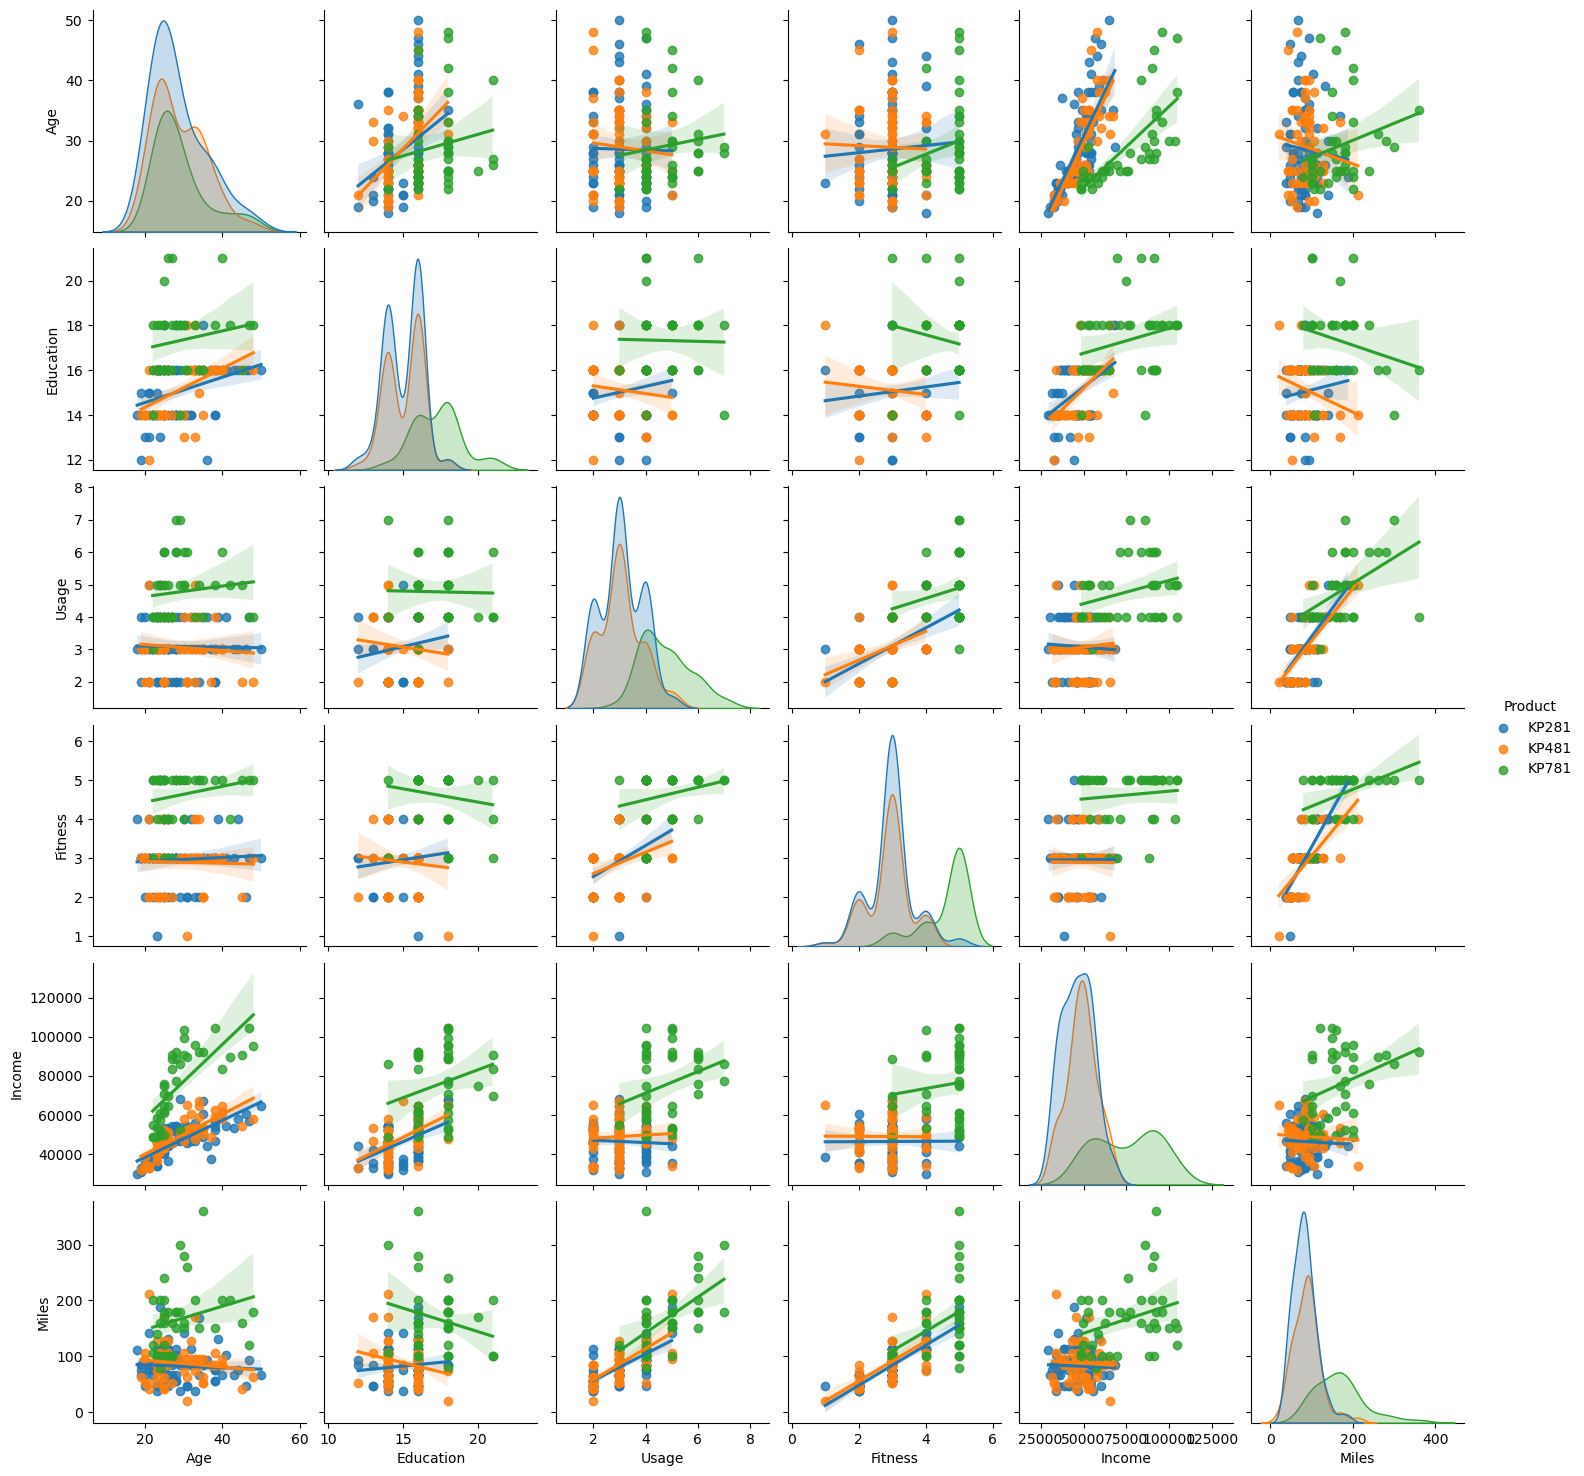

In [28]:
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

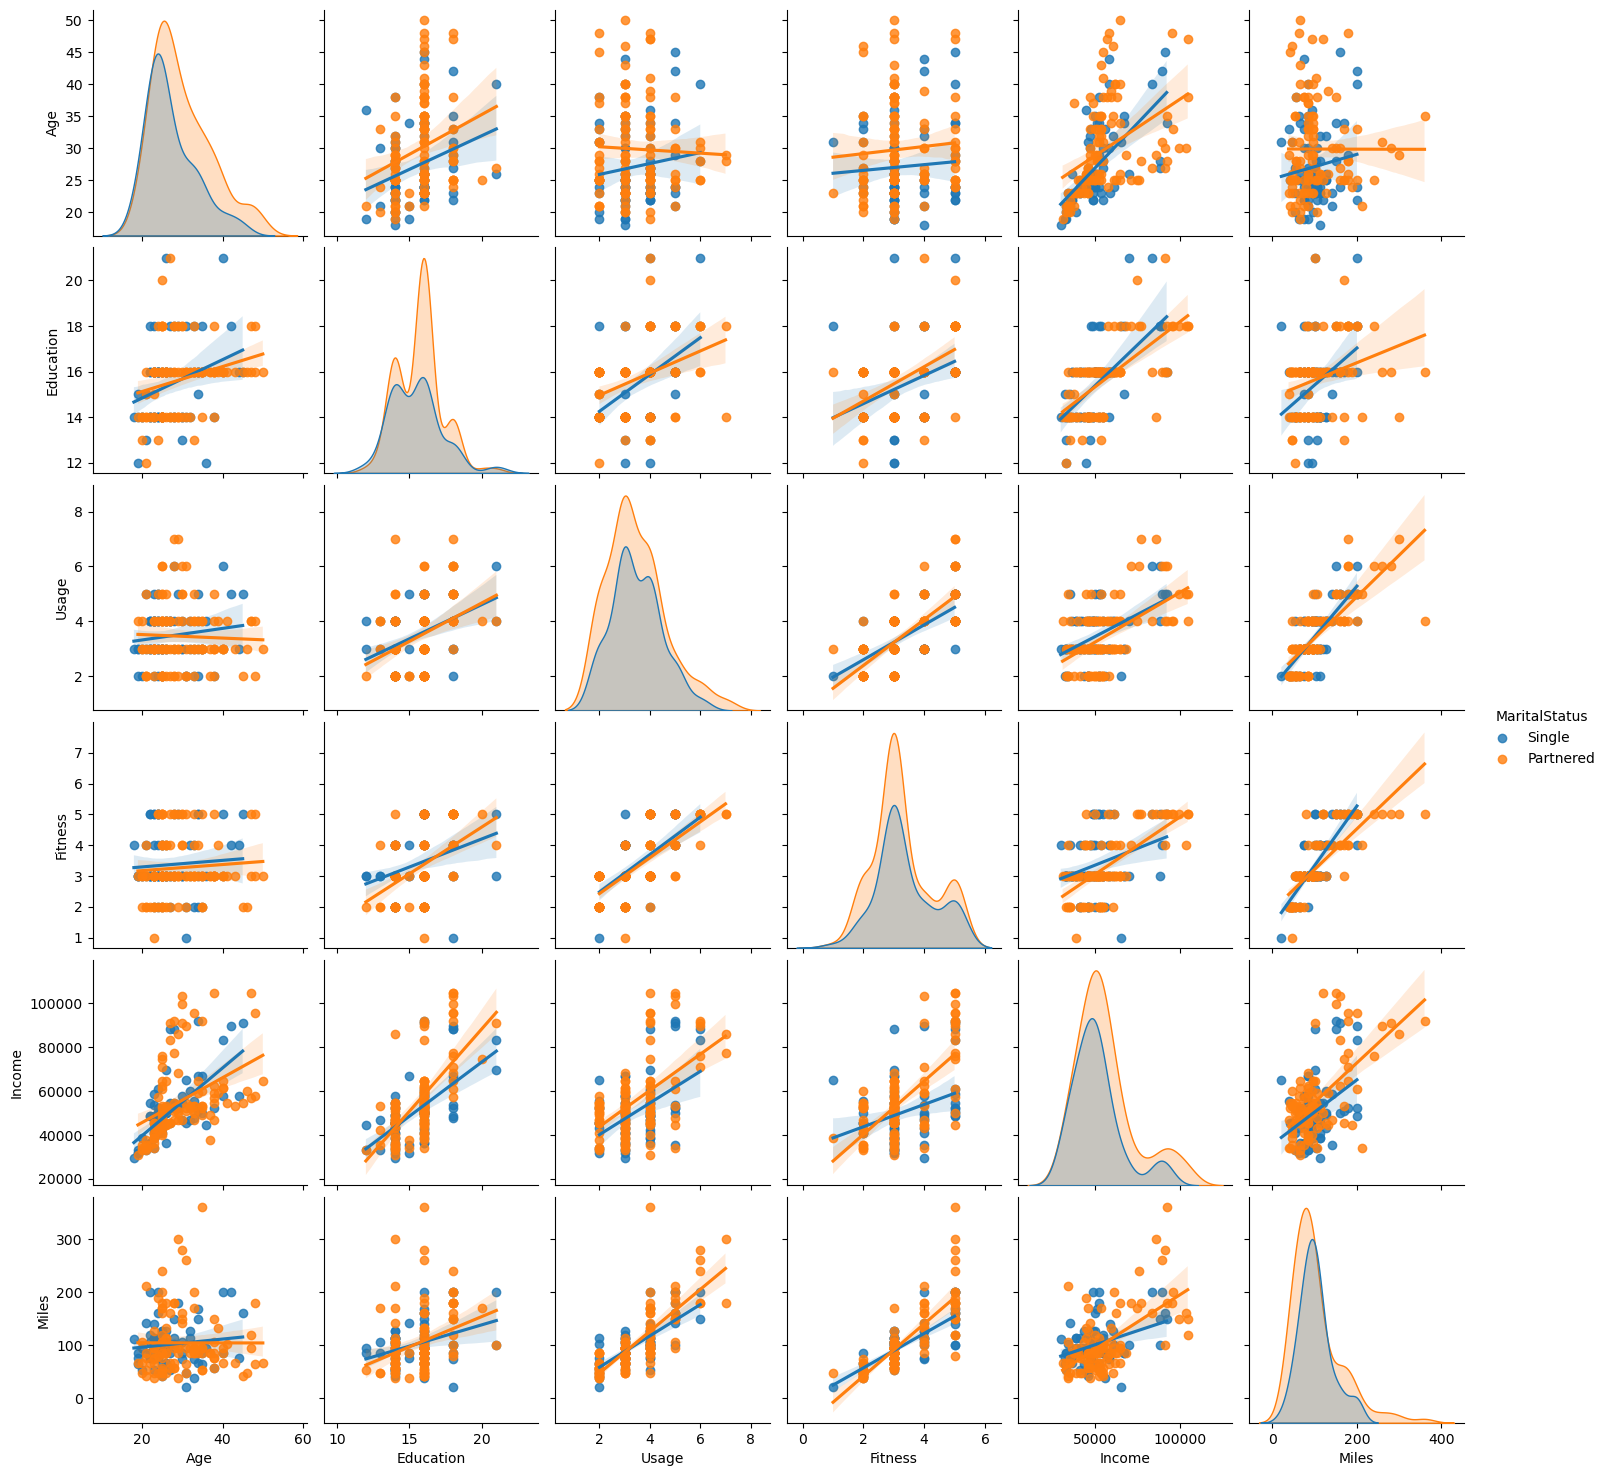

In [29]:
sns.pairplot(df,hue='MaritalStatus',kind='reg')
plt.show()

#### Bivariate

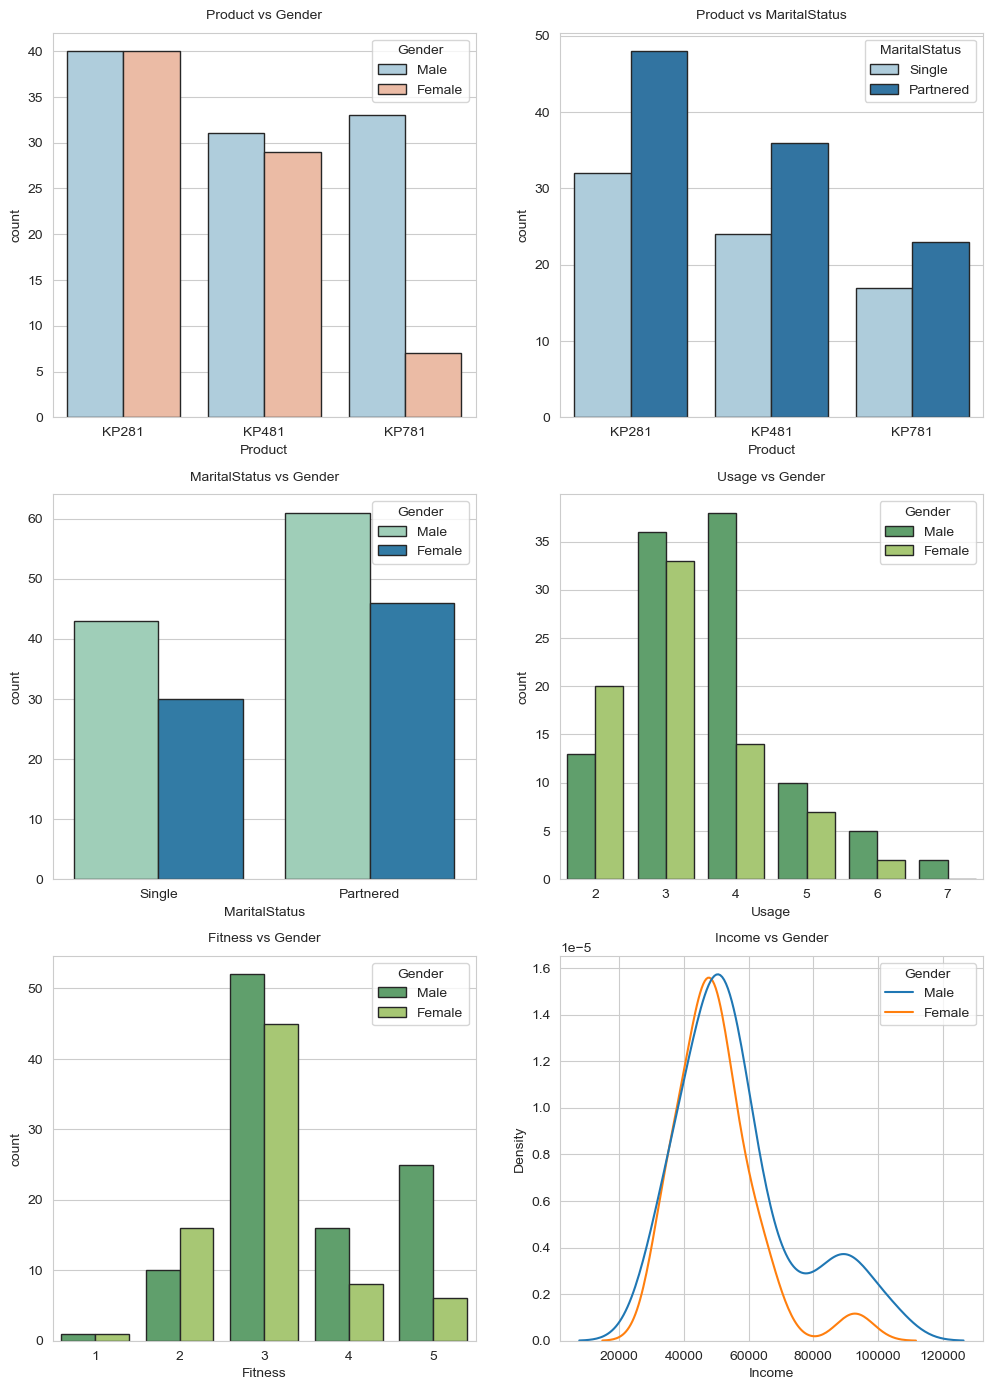

In [30]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(top=1.2)
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='RdBu_r', ax=axs[0,0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Paired', ax=axs[0,1])
sns.countplot(data=df, x='MaritalStatus', hue='Gender', edgecolor="0.15", palette='YlGnBu', ax=axs[1,0])
sns.countplot(data=df,x='Usage',hue='Gender',edgecolor="0.15", palette='summer', ax=axs[1,1])
sns.countplot(data=df,x='Fitness',hue='Gender',edgecolor="0.15", palette='summer', ax=axs[2,0])
sns.kdeplot(data=df,x='Income',hue='Gender', ax=axs[2,1])
axs[0,0].set_title("Product vs Gender", pad=10, fontsize=10)
axs[0,1].set_title("Product vs MaritalStatus", pad=10, fontsize=10)
axs[1,0].set_title("MaritalStatus vs Gender", pad=10, fontsize=10)
axs[1,1].set_title("Usage vs Gender", pad=10, fontsize=10)
axs[2,0].set_title("Fitness vs Gender", pad=10, fontsize=10)
axs[2,1].set_title("Income vs Gender", pad=10, fontsize=10)
plt.show()

Obervations

 **Product vs Gender**
- Equal number of males and females have purchased KP281 product and Almost same for the product KP481
- Most of the Male customers have purchased the KP781 product.

 **Product vs MaritalStatus**
- Customer who is Partnered, is more likely to purchase the product.
- Out of both Single and Partnered customers, Male customers are significantly high
- Female customers are considerably low compared to Male customers

 **MaritalStatus vs Gender**
- Partnered customers are the most buyers of aerofit product
- Out of both Single and Partnered customers, Male customers are significantly high
- Female customers are considerably low compared to Male customers

**Usage vs Gender**
- Among Male and Female genders, Male's usage is 4 days per week
- Female customers mostly use 3 days per week
- Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

**Fitness vs Gender**
- Among the fitness rating both Male and Female most have rated as average
- Significant number of Male customers are at Excellent shape compared to Female customers

**Income vs Gender**
- From the above diagram, we can conclude the spike from 40K to around 80K is the most common income per annum of the customers
 


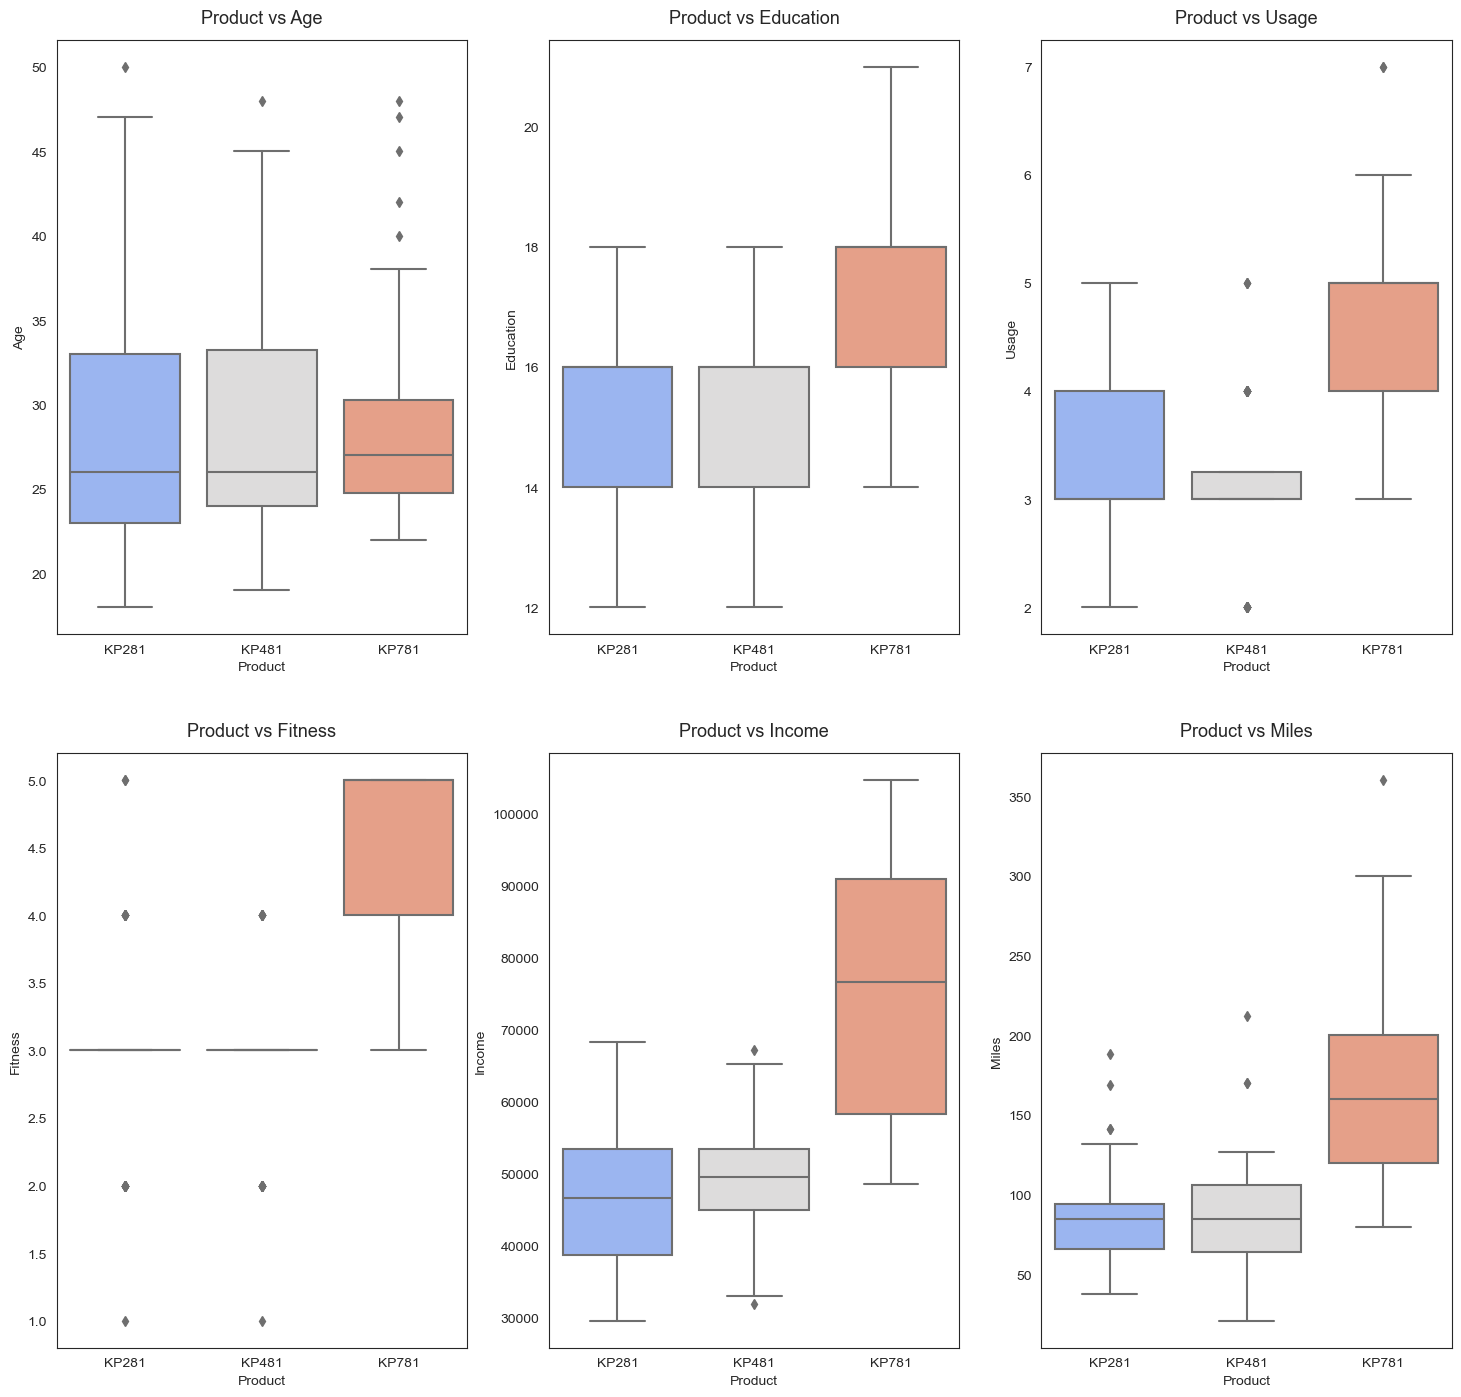

In [31]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='coolwarm')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
        

**Product vs Age**
- Customers purchasing products KP281 & KP481 are having same Age median value.
- Customers whose age lies between 25-30, are more likely to buy KP781 product

**Product vs Education**
- Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
- While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**Product vs Usage**
- Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
- While the other customers are likely to purchasing KP281 or KP481.
**Product vs Fitness**

- The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

**Product vs Income**
- Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

**Product vs Miles**
- If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

In [32]:
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

- Mean usage for product KP281 is 3.08
- Mean usage for product KP481 is 3.06
- Mean usage for product KP781 is 4.77

In [33]:
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

- Mean Age of the customer who purchased product KP281 is 28.55
- Mean Age of the customer who purchased product KP481 is 28.90
- Mean Age of the customer who purchased product KP781 is 29.10

In [34]:
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

- Mean Education qualification of the customer who purchased product KP281 is 15.03
- Mean Education qualification of the customer who purchased product KP481 is 15.11
- Mean Education qualification of the customer who purchased product KP781 is 17.32

In [35]:
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

- Customer fitness mean for product KP281 is 2.96
- Customer fitness mean for product KP481 is 2.90
- Customer fitness mean for product KP781 is 4.62

<Axes: xlabel='Miles', ylabel='Income'>

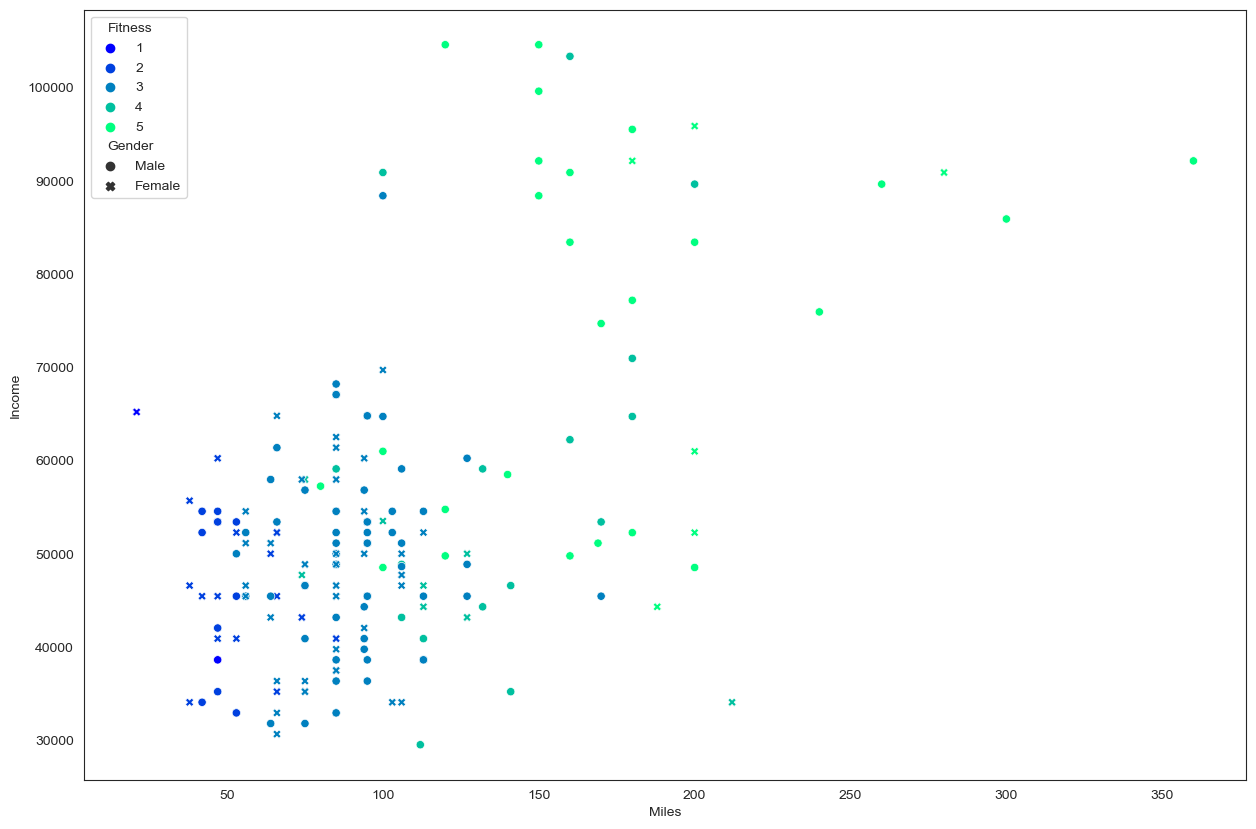

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')


- Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.

- Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.

- Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles.

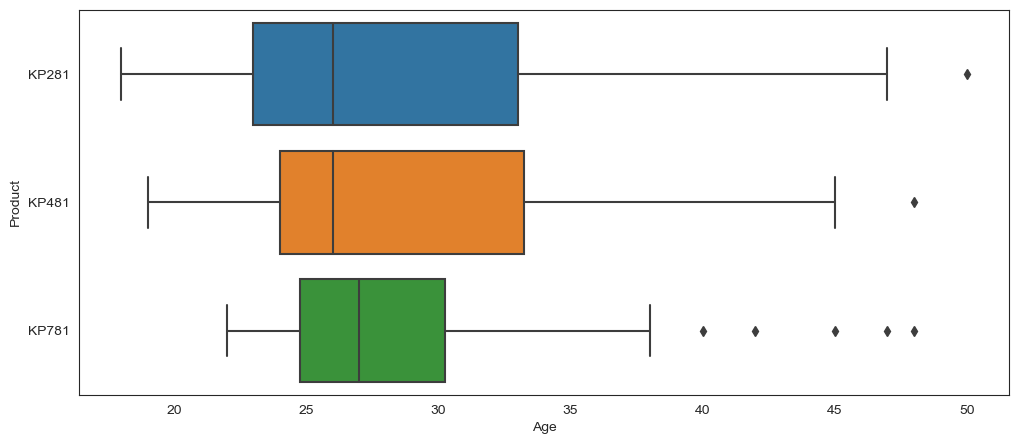

In [37]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=df)
plt.show()

- Roughly few customers with age above 40 use product KP781
- Most of the customers are comfortable with KP281 product type
- KP481 is the second highest popular product among the younger side of the customer

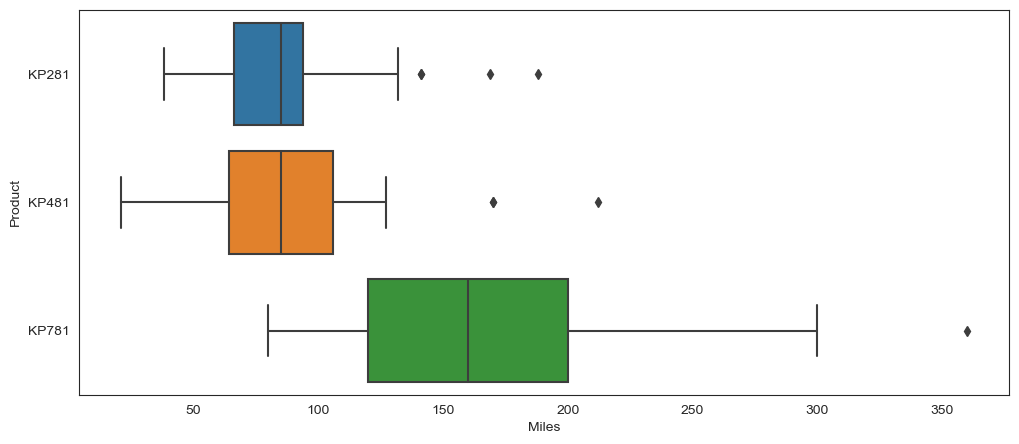

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=df)
plt.show()


- Customers with product KP781, has been able to cover more miles than other two product types
- KP481 product is the second most highest miles covering product among the customers
- KP281 product customer had covered less distance compared with other two product types

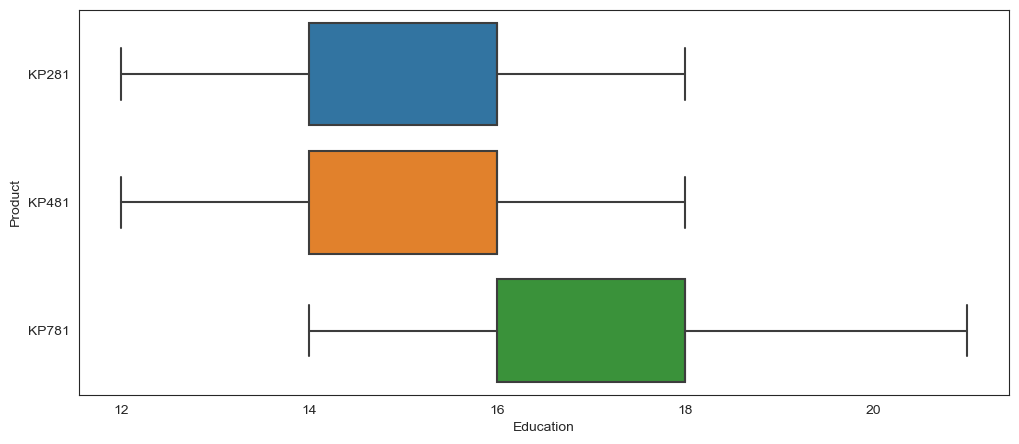

In [39]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=df)
plt.show()

- Customers with Higher education of 16 to 18 have preferred mostly product type KP781
- Customers with education between 14 to 16 prefer KP281 and KP481 equally

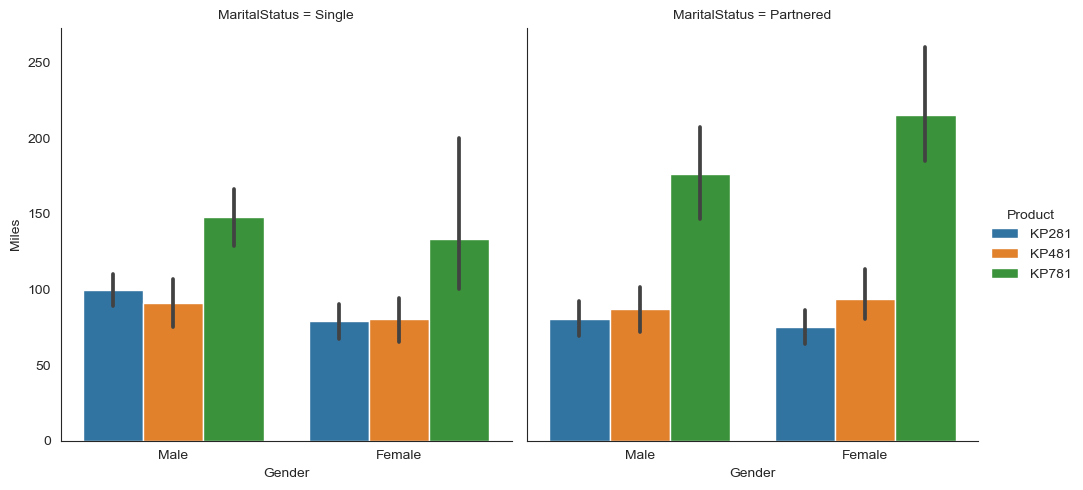

In [40]:
sns.catplot(x='Gender',y='Miles',hue='Product',col='MaritalStatus',data=df,kind='bar')
plt.show()

- KP781 is more populat among the single and Partnered customers
- Among the both marital statuses, Single female does not prefer much of the products.
- Partnered Female bought KP781 treadmill compared to Partnered Male.
- Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
- Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
- There are more single Males buying treadmill than single Females.
- Single Male customers bought KP781 treadmill compared to single Female.
- Partnered customers are more than Single customers

**Outliers**

Outliers for other categorical data are mentioned inline with the respective analysis

In [41]:
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


**Probability for each product for the both genders**

In [42]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")
    
df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


### Customer Age Group Analysis

In [43]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [44]:
df_cat.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [45]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [46]:
df_cat.age_group.value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [47]:
df_cat.loc[df_cat.Product=='KP281']["age_group"].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [48]:
df_cat.loc[df_cat.Product=='KP481']["age_group"].value_counts()

Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [49]:
df_cat.loc[df_cat.Product=='KP781']["age_group"].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [50]:
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize=True,margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


In [51]:
round(pd.crosstab(index=df_cat["Product"],columns=df_cat["Fitness_category"],normalize="columns")*100,2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,55.67,53.85,6.45,37.50,50.0
KP481,40.21,46.15,0.00,33.33,50.0
KP781,4.12,0.00,93.55,29.17,0.0


In [52]:
pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [53]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender,normalize=True)*100,2)

Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [54]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

#### Conditional and Marginal Probabilities

In [55]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [56]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

- Probability of Male Customer Purchasing any product is : 57.77 %

- Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

- product KP281 is : 44.44 % (cheapest / entry level product)

- product KP481 is : 33.33 % (intermediate user level product)

- product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

**Conditional Probabilities**

In [57]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

#### Objective: Customer Profiling for Each Product

**KP281**

- Easily affordable entry level product, which is also the maximum selling product.

- KP281 is the most popular product among the entry level customers.

- This product is easily afforded by both Male and Female customers.

- Average distance covered in this model is around 70 to 90 miles.

- Product is used 3 to 4 times a week.

- Most of the customer who have purchased the product have rated Average shape as the fitness rating.

- Younger to Elder beginner level customers prefer this product.

- Single female & Partnered male customers bought this product more than single male customers.

- Income range between 39K to 53K have preferred this product.

**KP481**

- This is an Intermediate level Product.

- KP481 is the second most popular product among the customers.

- Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

- Customers Prefer this product mostly to cover more miles than fitness.

- Average distance covered in this product is from 70 to 130 miles per week.

- More Female customers prefer this product than males.

- Probability of Female customer buying KP481 is significantly higher than male.

- KP481 product is specifically recommended for Female customers who are intermediate user.

- Three different age groups prefer this product - Teen, Adult and middle aged.

- Average Income of the customer who buys KP481 is 49K.

- Average Usage of this product is 3 days per week.

- More Partnered customers prefer this product.

- There are slightly more male buyers of the KP481.

- The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.

- The buyers of KP481 in Single & Partnered, Male & Female are same.

- The age range of KP481 treadmill customers is roughly between 24-34 years.

**KP781**

- Due to the High Price & being the advanced type, customer prefers less of this product.

- Customers use this product mainly to cover more distance.

- Customers who use this product have rated excelled shape as fitness rating.

- Customer walk/run average 120 to 200 or more miles per week on his product.

- Customers use 4 to 5 times a week at least.

- Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

- Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

- Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

- Middle aged to higher age customers tend to use this model to cover more distance.

- Average Income of KP781 buyers are over 75K per annum

- Partnered Female bought KP781 treadmill compared to Partnered Male.

- Customers who have more experience with previous aerofit products tend to buy this product

- This product is preferred by the customer where the correlation between Education and Income is High.

**Recommendation**

- Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

- KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

- As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

- KP781 product should be promotted using influencers and other international atheletes.

- Research required for expanding market beyond 50 years of age considering health pros and cons.

- Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

- KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.

- Target the Age group above 40 years to recommend Product KP781.